In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from itertools import combinations
import hashlib
import pickle
import utils

## Exhaustive Generation

In [2]:
def get_image_hash(l):
    ls = ''.join(map(str, l))
    hash_ = hashlib.md5(ls.encode())
    fn = f'{hash_.hexdigest()[:8]}'
    return fn

In [3]:
def save_items(num_circles=12, radius=0.5, fill_list=[], img_size=(224, 224), edgecolor='black', facecolor='black', folder='generated_set/'):
    fig, ax = plt.subplots(figsize=(img_size[0] / 100, img_size[1] / 100), dpi=100)
    ax.set_aspect('equal')
    
    for i in range(num_circles):
        circle = plt.Circle((i * (2 * radius + 1), 0), radius, fill=fill_list[i], edgecolor=edgecolor, facecolor=facecolor)
        ax.add_artist(circle)

    ax.set_xlim(-1, num_circles * (2 * radius + 1) - 1)
    ax.set_ylim(-1, 1)
    ax.axis('off')

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image = Image.fromarray(image).resize(img_size)
    image = np.array(image)
    plt.close(fig)
    if folder:
        fn = folder + get_image_hash(fill_list) + '.png'
    else:
        fn = get_image_hash(fill_list) + '.png'
    Image.fromarray(image).save(fn)
# save_items(radius=0.75, fill_list=[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [6]:
def generate_binary_lists(length=12, min_ones=4, max_ones=10):
    ret = []
    for ones in range(min_ones, max_ones + 1):
        for idxs in combinations(range(length), ones):
            lst = [0] * length
            for idx in idxs:
                lst[idx] = 1
            ret.append(lst)
    return ret
all_lists = generate_binary_lists(12, 1, 11)
print("Number of lists:", len(all_lists))

Number of lists: 4094


In [7]:
def generate_dict(all_lists, hashes, num):
    d = {}
    for i in range(len(all_lists)):
        d[hashes[i]] = all_lists[i]
    with open(f'mappings/exhaustive_mapping_{num}.pkl', 'wb') as f:
        pickle.dump(d, f)
    # return d

In [8]:
def load_dict(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [10]:
hashes = []
for list_ in all_lists:
    hashes.append(get_image_hash(list_))
assert len(hashes) == len(set(hashes))

generate_dict(all_lists, hashes, 12)

for list_ in all_lists:
    save_items(radius=0.75, fill_list=list_, edgecolor='black', facecolor='black', folder='exhaustive_generated_set/12/')

C:\Users\afxwo\AppData\Local\Temp\ipykernel_14264\2420007771.py:14: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


IndexError: list index out of range

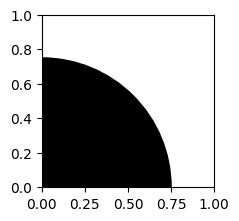

In [ ]:
hashes = []
all_lists = generate_binary_lists(11)
for list_ in all_lists:
    hashes.append(get_image_hash(list_))
assert len(hashes) == len(set(hashes))

generate_dict(all_lists, hashes, 11)

for list_ in all_lists:
    save_items(num_circles=11, radius=0.75, fill_list=list_, edgecolor='black', facecolor='black', folder='generated_set/11/')